In [1]:
# Import the importance libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("AdSmartABdata - AdSmartABdata.csv")
dataset.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
dataset.shape

(8077, 9)

# Exploratory Data Analysis

In [4]:
dataset.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [5]:
dataset["experiment"].unique()

array(['exposed', 'control'], dtype=object)

In [6]:
dataset["yes"].sum()

572

In [7]:
dataset["no"].sum()

671

<Axes: ylabel='hour'>

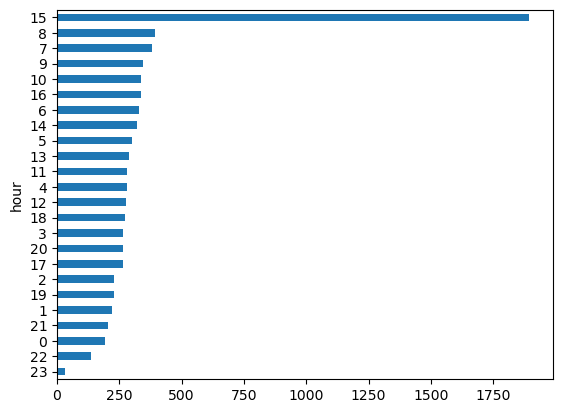

In [8]:
dataset["hour"].value_counts().sort_values().plot(kind="barh")

In [9]:
dataset.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [10]:
dataset["device_make"].value_counts()

device_make
Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
Samsung SM-G925I          1
XiaoMi Redmi Note 5       1
Name: count, Length: 269, dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [12]:
dataset.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [13]:
dataset.duplicated(subset="auction_id").sum()

0

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
def get_response(row):
    if row[0] == 1:
        res = "yes"
    elif row[1] == 1:
        res = "no"
    else:
        res = "no response"
        
    return res

In [16]:
# Make different copy statistic test
df = dataset.copy()
df['no_response'] = (df['yes']+df['no']).apply(lambda x: 1 if x < 1 else 0)

# Use dataset with different methode to easier visualization
dataset["response"] = dataset[["yes", "no"]].apply(get_response, axis=1)
dataset.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,no response
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,no response
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,no response
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,no response


In [17]:
 df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,no_response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,1
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,1
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,1
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,1


In [18]:
dataset.shape, df.shape

((8077, 10), (8077, 10))

/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


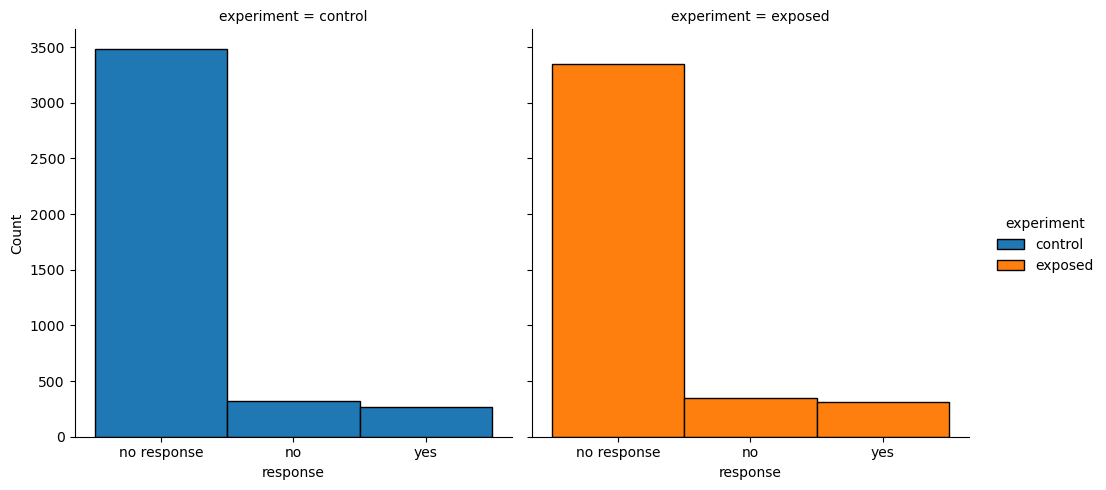

In [19]:
import seaborn as sns
sns.displot(dataset.sort_values(by="experiment"),
            x="response",
            col="experiment",
            hue="experiment",
            alpha=1)
plt.show()

In [20]:
def data_percent(rows, decimal=2):
    return round(rows/max(rows)*100, decimal)

# Make the pivot table
dataset_response = pd.pivot_table(data=dataset,
                                  index="experiment",
                                  columns="response",
                                  aggfunc="count")["auction_id"]

# Sum all response to columns total
dataset_response["total"] = dataset_response.apply(sum, axis=1)

# Convert all response to percentage
dataset_response = dataset_response.apply(data_percent, axis=1)

# Change the columns name to easier diff
dataset_response.columns.name = "response %"

# Sort the values
dataset_response = dataset_response[["yes", "no", "no response"]] 

# Show the output
display(dataset_response)

response %,yes,no,no response
experiment,,,
control,6.48,7.91,85.61
exposed,7.69,8.71,83.60


In [21]:
# Convert response to number
dataset = dataset[(dataset["yes"] == 1) | (dataset["no"] == 1)]

/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


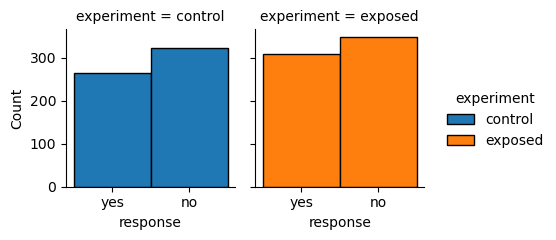

In [22]:
sns.displot(data=dataset.sort_values(by="experiment"),
            x="response",
            col="experiment",
            hue="experiment",
            alpha=1,
            aspect=0.9,
            height=2.5)
plt.show()

In [23]:
# Make the pivot table
df_response = pd.pivot_table(data=dataset,
                             index="experiment",
                             columns="response",
                             aggfunc="count")["auction_id"]

# Sum the all response
df_response["total"] = df_response.apply(sum, axis=1)

# Convert all response to percentage
df_response = df_response.apply(data_percent, axis=1)

# Change the columns name to easier diff
df_response.columns.name = "response %"

# Change the sort values
df_response = df_response[["yes", "no"]] 

# Show the output
display(df_response)

response %,yes,no
experiment,,
control,45.05,54.95
exposed,46.88,53.12


/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


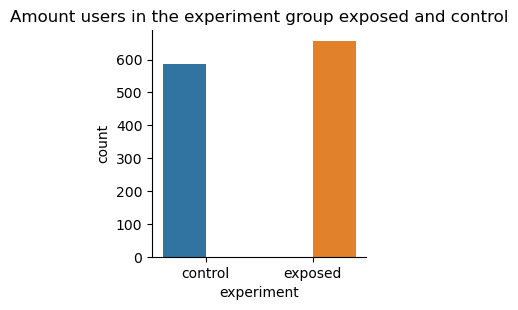

In [24]:
# Calculate how many users response in the experiment
sns.catplot(data=dataset.sort_values(by="experiment"),
            x="experiment",
            kind="count",
            hue="experiment",
            height=3).set(title="Amount users in the experiment group exposed and control")
plt.show()

In [25]:
print(f"Percent of users in control group: {(len(dataset[dataset['experiment'] == 'control'])/len(dataset))*100:.2f}%")
print(f"Percent of users in exposed group: {(len(dataset[dataset['experiment'] == 'exposed'])/len(dataset))*100:.2f}%")

Percent of users in control group: 47.14%
Percent of users in exposed group: 52.86%


In [26]:
# Time experiment start and end
print(f"First day of experiments: {dataset['date'].min()}")
print(f"Last day of experiments: {dataset['date'].max()}")

First day of experiments: 2020-07-03
Last day of experiments: 2020-07-10


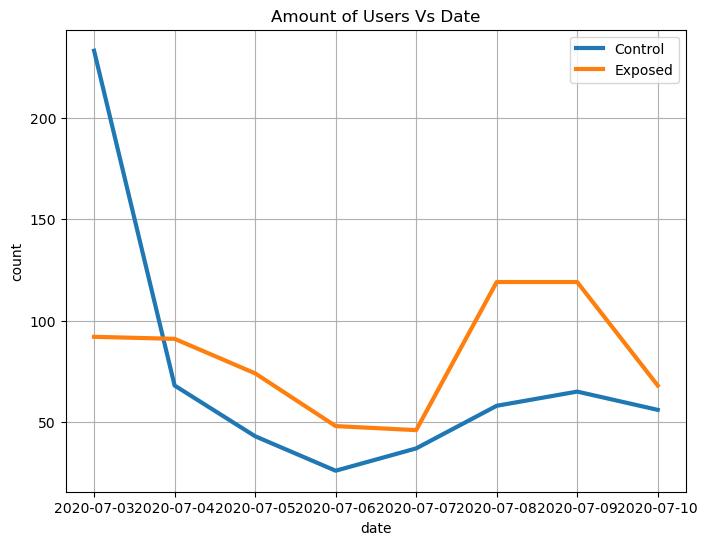

In [27]:
# Amounts user in different days
date_control = dataset.groupby(["experiment", "date"])["date"].count()["control"]
date_exposed = dataset.groupby(["experiment", "date"])["date"].count()["exposed"]

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
g = sns.lineplot(data=date_control,
                 ax=ax,
                 label="Control",
                 linewidth=3)
g = sns.lineplot(data=date_exposed,
                 ax=ax,
                 label="Exposed",
                 linewidth=3)
ax.grid(True)
ax.set_ylabel("count")
ax.set_title("Amount of Users Vs Date")
plt.show()

/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-22, 60, 'Anomaly at 15 h:\n249 impressions/h       ->')

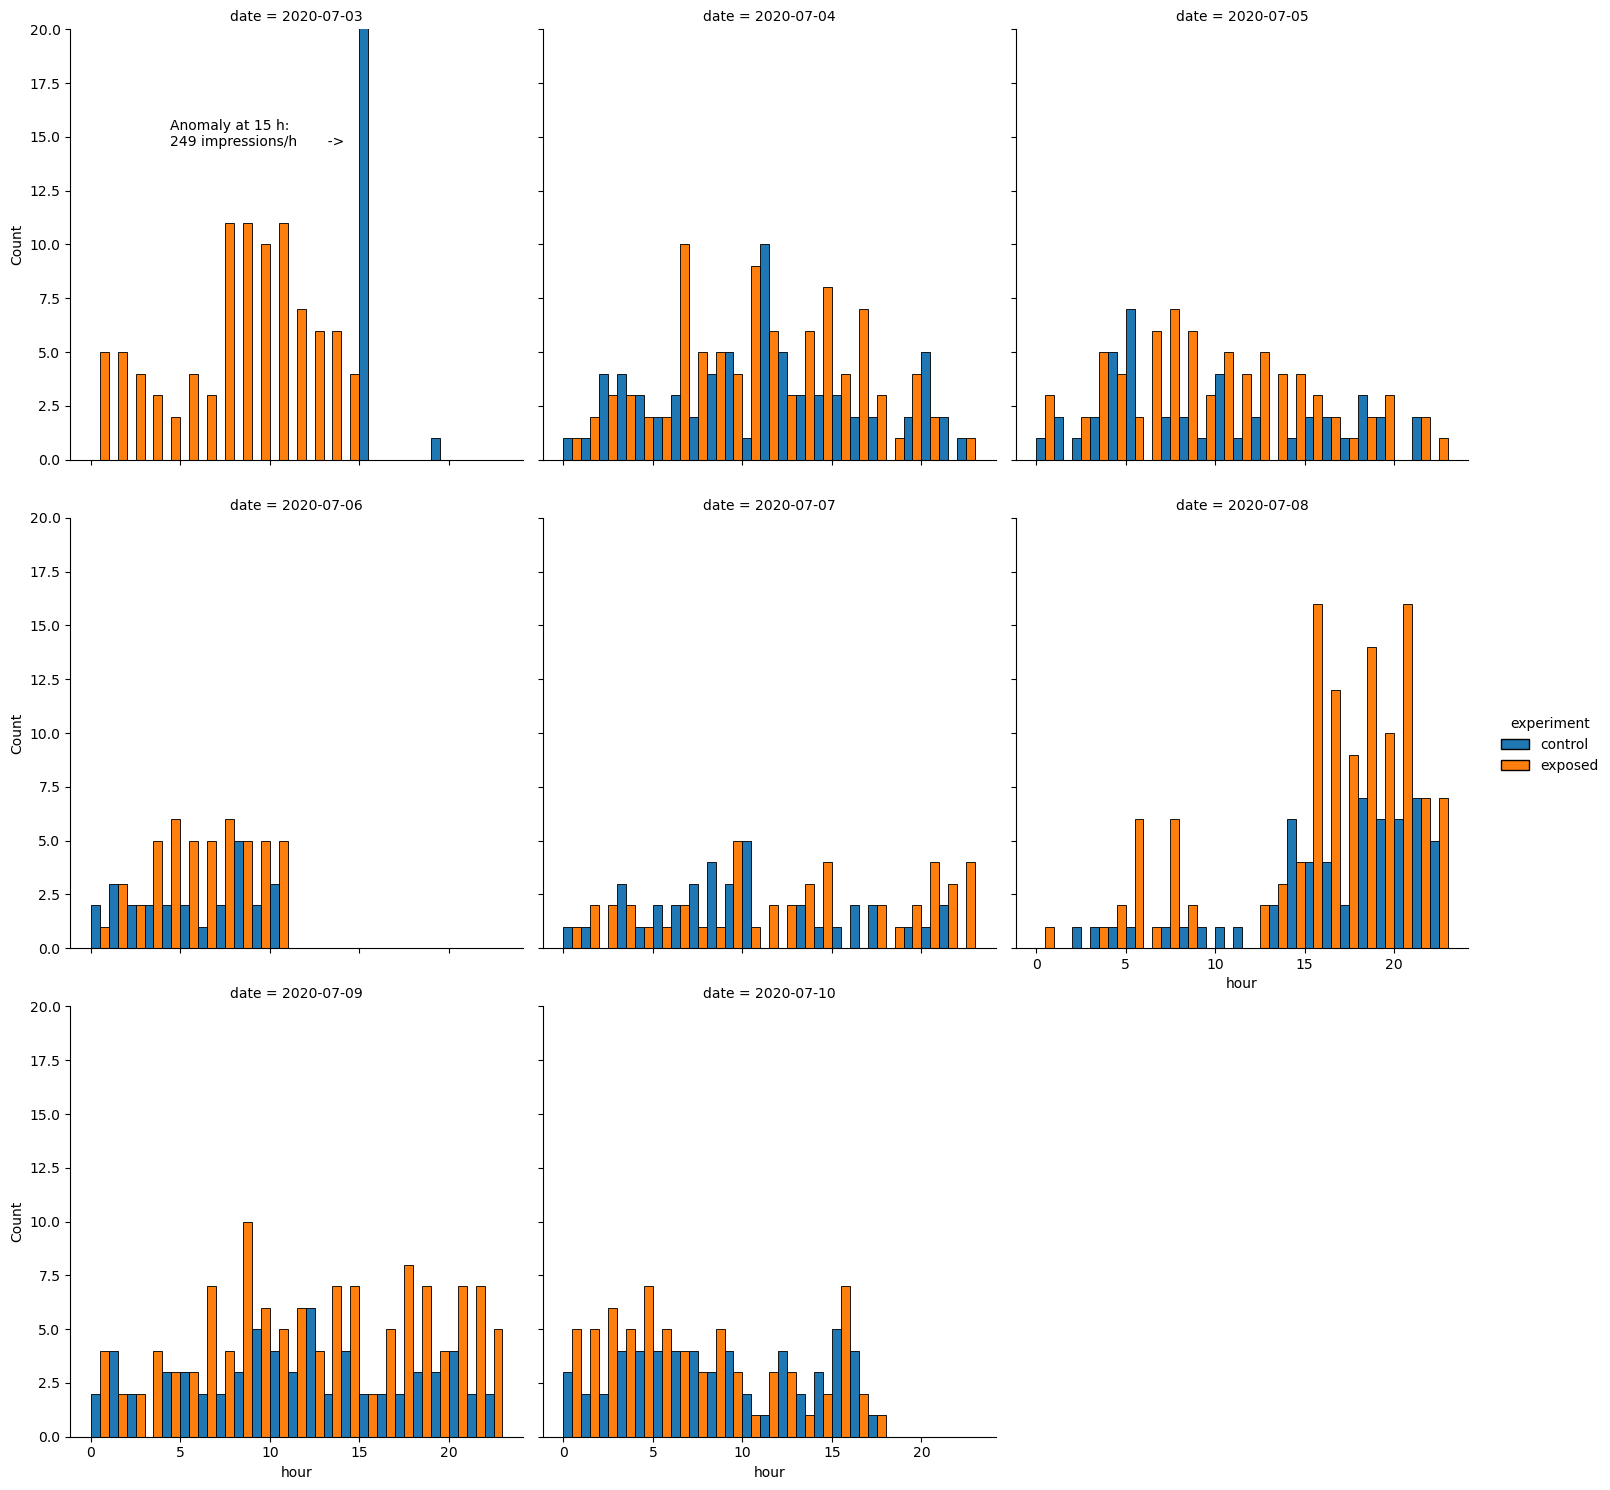

In [28]:
sns.displot(data=dataset.sort_values(by=["date", "experiment"]),
            x="hour",
            col="date",
            bins=range(24),
            hue="experiment",
            alpha=1,
            col_wrap=3,
            facet_kws=dict(sharey=True),
            multiple="dodge")
plt.ylim([0, 20])

# Anomaly value
anomaly = dataset[dataset["experiment"] == "control"].groupby("hour")["experiment"].count().max()

plt.text(-22, 60, f"Anomaly at 15 h:\n{anomaly} impressions/h       ->")

In [29]:
from wordcloud import WordCloud
def word_cloud(data, title):
    # Create the text variable
    text = " ".join(device_make.split(' ')[0] for device_make in data)

    # Create word_cloud using **.generate()** method
    word_cloud = WordCloud(collocations=False, 
                           background_color='#F3F3F3').generate(text)

    # Display Word Cloud
    plt.imshow(word_cloud, interpolation='none')
    plt.title(title+'\n')
    plt.axis("off")
    plt.show()

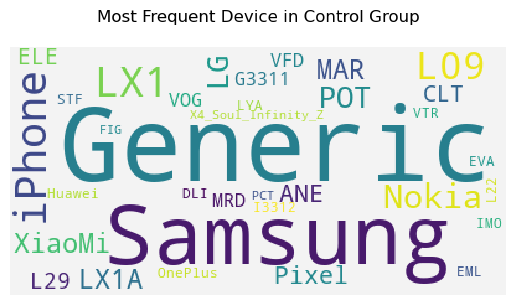

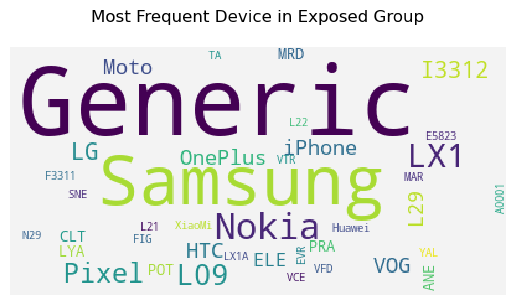

In [30]:
word_cloud(dataset[dataset["experiment"]=="control"].device_make,
           "Most Frequent Device in Control Group")
word_cloud(dataset[dataset["experiment"]=="exposed"].device_make,
           "Most Frequent Device in Exposed Group")

In [31]:
dataset["browser"].unique()

array(['Chrome Mobile WebView', 'Chrome Mobile', 'Facebook',
       'Samsung Internet', 'Mobile Safari', 'Chrome',
       'Mobile Safari UI/WKWebView', 'Chrome Mobile iOS'], dtype=object)

In [32]:
def browsers(row):
    browsers= {'Chrome Mobile WebView': "Chrome", 
               'Chrome Mobile': "Chrome", 
               'Facebook': "Facebook",       
               'Samsung Internet': "Samsung", 
               'Mobile Safari': "Safari", 
               'Chrome': "Chrome",       
               'Mobile Safari UI/WKWebView': "Safari", 
               'Chrome Mobile iOS': "Chrome"}
    return browsers[row]

# Convert to general browser
dataset["general_browser"] = dataset["browser"].apply(browsers)

/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


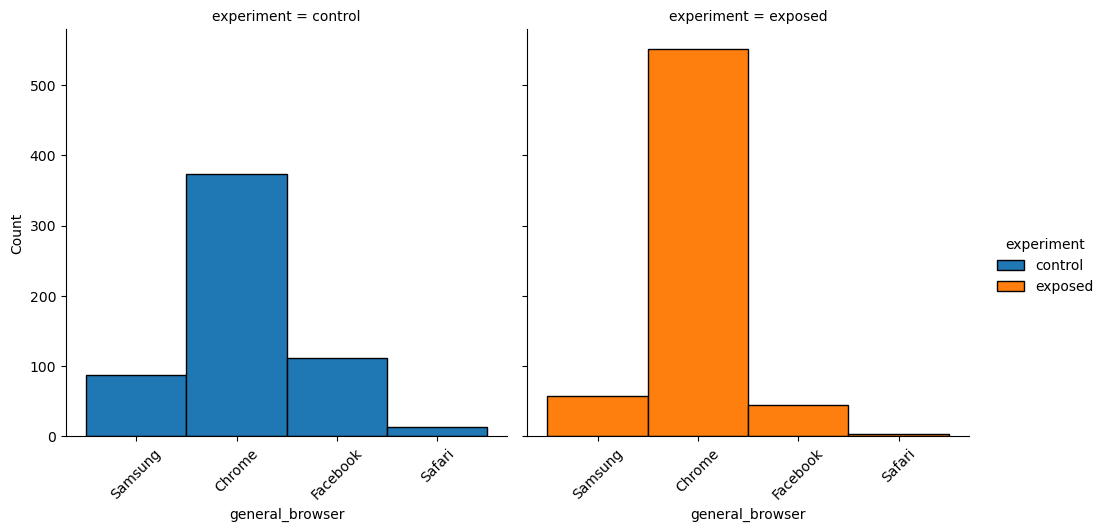

In [33]:
# Visualize
g = sns.displot(dataset.sort_values(by="experiment"),
                x="general_browser",
                col="experiment",
                hue="experiment", 
                alpha=1)

# Rotate the x label
g.set_xticklabels(rotation=45)

# Show the plot
plt.show()

In [34]:
# Make pivot table
df_browser = pd.pivot_table(data=dataset,
                            index="experiment",
                            columns="general_browser",
                            aggfunc="count")["auction_id"]

# Calculate the total browser
df_browser["total"] = df_browser.apply(sum, axis=1)

# Calculate the percent
df_browser = df_browser.apply(data_percent, axis=1)

# Change columns name to make table more readable
df_browser.columns.name = 'browser usage %'

# Sort the columns name
df_browser = df_browser[['Samsung', 'Chrome', 'Facebook', 'Safari']]

# Shows the table
display(df_browser)

browser usage %,Samsung,Chrome,Facebook,Safari
experiment,,,,
control,15.02,63.65,19.11,2.22
exposed,8.68,84.02,6.70,0.61


#of os: 2


/Users/user/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


platform_os
6    0.986323
5    0.013677
Name: proportion, dtype: float64

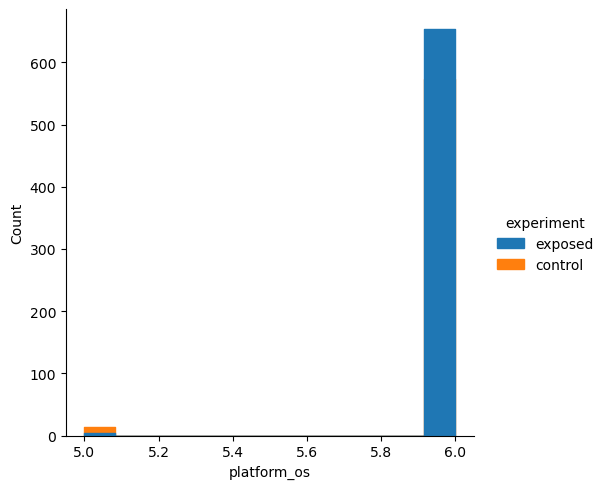

In [35]:
os_counts = dataset['platform_os'].value_counts(normalize=True)

sns.displot(data=dataset,
            x='platform_os',
            hue="experiment",
            alpha=1,
            element="step")
print('#of os:',len(os_counts))
os_counts


# A/B Test

In [36]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,no_response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,1
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,1
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,1
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,1


In [37]:
# Import the library
from scipy.stats import chi2_contingency

# Split the data into exposed and control
df_exp = df[df["experiment"]=="exposed"]
df_ctr = df[df["experiment"]=="control"]

In [38]:
df.shape, df_exp.shape, df_ctr.shape

((8077, 10), (4006, 10), (4071, 10))

## Chi-Square Contingency Methode

### Split the data into yes, no and no response

In [39]:
# Calculate the sum of exposed and control group
exp_response = [df_exp['yes'].sum(), df_exp['no'].sum(), df_exp['no_response'].sum()]
ctr_response = [df_ctr['yes'].sum(), df_ctr['no'].sum(), df_ctr['no_response'].sum()]
exp_response, ctr_response

([308, 349, 3349], [264, 322, 3485])

In [40]:
# Calculate the observed value
obs = np.array([exp_response, ctr_response])
obs/obs.sum(axis=1).reshape(2, 1)

array([[0.07688467, 0.08711932, 0.83599601],
       [0.06484893, 0.07909605, 0.85605502]])

### Chi-Square Homogenity test yes, no and no response

In [41]:
# Observe the proportion value
result = chi2_contingency(obs)

# Print the value
print('Chi-square statistic:',result[0])
print('p-value:',result[1])
print('DOF:',result[2])
print('Expected Frequencies:',result[3])

Chi-square statistic: 6.6548619304511725
p-value: 0.03588517701663859
DOF: 2
Expected Frequencies: [[ 283.69840287  332.80004952 3389.5015476 ]
 [ 288.30159713  338.19995048 3444.4984524 ]]


### Chi-Square Homogenity test yes and no 

In [42]:
obs = np.array([ctr_response[:2], exp_response[:2]])
obs/obs.sum(axis=1).reshape(2, 1)

array([[0.45051195, 0.54948805],
       [0.46879756, 0.53120244]])

In [43]:
# Calculate the observe value
result = chi2_contingency(obs)

# Print the result
print(f"Chi-square statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"DOF: {result[2]}")
print(f"Frequencies: {result[3]}")

Chi-square statistic: 0.3465426444731172
p-value: 0.5560768104229136
DOF: 1
Frequencies: [[269.66371681 316.33628319]
 [302.33628319 354.66371681]]


### Proportion Test Total

In [44]:
# Calculate the total response
ctr_response_total = sum(ctr_response)
exp_response_total = sum(exp_response)

# Import the test library
from statsmodels.stats.proportion import proportions_ztest
count = np.array([exp_response[0], ctr_response[0]])
nobs = np.array([exp_response_total, ctr_response_total])

# Test the vakue
stat, pval = proportions_ztest(count, nobs)
print('test of proportions of YES among yes, no, and no_response')
print('stat',stat)
print('p-value: {0:0.3f}'.format(pval))

test of proportions of YES among yes, no, and no_response
stat 2.108290999972843
p-value: 0.035


In [45]:
# Overwrite the variable with new value in the array
count = np.array([exp_response[1], ctr_response[1]])
nobs = np.array([exp_response_total, ctr_response_total])

# Test the value
stat, pval = proportions_ztest(count, nobs)
print('test of proportions of NO among yes and no')
print('stat',stat)
print('p-value: {0:0.3f}'.format(pval))

test of proportions of NO among yes and no
stat 1.3062601366477093
p-value: 0.191


#### One-sided Proportion Test

##### Test of proportion of YES among yes, no and no response

In [46]:
# One-sided Larger Test
count = np.array([exp_response[0], ctr_response[0]])
nobs = np.array([exp_response_total, ctr_response_total])

# Test the value
stats, pval = proportions_ztest(count, nobs, alternative="larger")
print("Test of proportion of YES among yes, no and no response")
print(f"Stats: {stats}")
print(f"p-value: {pval:.3f}")

Test of proportion of YES among yes, no and no response
Stats: 2.108290999972843
p-value: 0.018


In [47]:
# One-sided Smaller Test
count = np.array([exp_response[0], ctr_response[0]])
nobs = np.array([exp_response_total, ctr_response_total])

# Test the value
stats, pval = proportions_ztest(count, nobs, alternative="smaller")
print("Test of proportion of YES among yes, no and no response")
print(f"Stats: {stats}")
print(f"p-value: {pval:.3f}")

Test of proportion of YES among yes, no and no response
Stats: 2.108290999972843
p-value: 0.982


##### Test of proportion of Yes among yes and no

In [48]:
# Two-sided Test Proportion Test
# Calculate the sum of yes and no proportion
prop_ctr_response = ctr_response[0] + ctr_response[1]
prop_exp_response = exp_response[0] + exp_response[1]

# Overwrite the variable
count = np.array([exp_response[1], ctr_response[1]])
nobs = np.array([prop_exp_response, prop_ctr_response])

# Test the value
stats, pval = proportions_ztest(count, nobs)
print("Test of proportion of Yes among yes and no")
print(f"Stats: {stats}")
print(f"p-value: {pval:.3f}")

Test of proportion of Yes among yes and no
Stats: -0.645680181221035
p-value: 0.518


In [49]:
# One-sided Larger Test
# Calculate the sum of yes and no proportion
prop_ctr_response = ctr_response[0] + ctr_response[1]
prop_exp_response = exp_response[0] + exp_response[1]

# Overwrite the variable
count = np.array([exp_response[1], ctr_response[1]])
nobs = np.array([prop_exp_response, prop_ctr_response])

# Test the value
stats, pval = proportions_ztest(count, nobs, alternative="larger")
print("Test of proportion of Yes among yes and no")
print(f"Stats: {stats}")
print(f"p-value: {pval:.3f}")

Test of proportion of Yes among yes and no
Stats: -0.645680181221035
p-value: 0.741


In [50]:
# One-sided Smaller Test
# Calculate the sum of yes and no proportion
prop_ctr_response = ctr_response[0] + ctr_response[1]
prop_exp_response = exp_response[0] + exp_response[1]

# Overwrite the variable
count = np.array([exp_response[1], ctr_response[1]])
nobs = np.array([prop_exp_response, prop_ctr_response])

# Test the value
stats, pval = proportions_ztest(count, nobs, alternative="smaller")
print("Test of proportion of Yes among yes and no")
print(f"Stats: {stats}")
print(f"p-value: {pval:.3f}")

Test of proportion of Yes among yes and no
Stats: -0.645680181221035
p-value: 0.259
